# TensorFlow and Keras

In [10]:
#Uncomment and use it
#!pip install tensorflow

In [11]:
!pip show tensorflow

Name: tensorflow
Version: 2.0.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\statinfer\appdata\roaming\python\python37\site-packages
Requires: protobuf, opt-einsum, numpy, gast, termcolor, six, tensorflow-estimator, wheel, google-pasta, wrapt, astor, tensorboard, absl-py, keras-preprocessing, grpcio, keras-applications
Required-by: 


In [12]:
import tensorflow as tf

## Tensors

#### Constants

tf.constant creates constant values, these values do not change
or update during optimization process(training phase)

In [13]:
a = tf.constant([50,10])
print(a)

tf.Tensor([50 10], shape=(2,), dtype=int32)


Few things that we can do with the tensors at the runtime:
1. Directly get a numpy value of the tensor
2. dtype : data type of the tensor(int16/int32/float32/float64)
3. shape: shape of the tensor

In [14]:
print('a in tensorflow ==>', a)
print('numpy value of a ==>', a.numpy())
print('dtype of a ==>', a.dtype)
print('shape of a ==>', a.shape)

a in tensorflow ==> tf.Tensor([50 10], shape=(2,), dtype=int32)
numpy value of a ==> [50 10]
dtype of a ==> <dtype: 'int32'>
shape of a ==> (2,)


We can use inbuild tf.XX() function to create constant tensors, just like numpy.

In [15]:
print('Tensor of Ones: \n',tf.ones(shape=(2, 2)))
print('Tensor of Zeros: \n',tf.zeros(shape=(2, 2)))
print('Random normal values \n', tf.random.normal(shape=(3, 2),
                                                  mean=5, 
                                                  stddev=1))

Tensor of Ones: 
 tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
Tensor of Zeros: 
 tf.Tensor(
[[0. 0.]
 [0. 0.]], shape=(2, 2), dtype=float32)
Random normal values 
 tf.Tensor(
[[6.0224996 5.9507556]
 [6.110808  5.776061 ]
 [4.702984  6.0466003]], shape=(3, 2), dtype=float32)


### Variables

We generally create a variable with some values, call it initialized values, 
convert this constant tensor into a variable and then mutate the variable by using special functions.

In [16]:
x = tf.Variable(5) # Simple variable
print(x)

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=5>


In [17]:
#randomly initialized variable, like we need for our weights
w = tf.Variable(tf.random.normal(shape=(2, 2))) 
print(w)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[-0.21380416,  0.60465974],
       [ 0.31995222, -0.8001266 ]], dtype=float32)>


In [18]:
m = tf.Variable(5) # Simple variable
print(m)

m = tf.Variable(5) 
print('New value', m.assign(2))

m = tf.Variable(5) 
print('increment by 1', m.assign_add(1))

m = tf.Variable(5) 
print('Decrement by 2', m.assign_sub(2))


<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=5>
New value <tf.Variable 'UnreadVariable' shape=() dtype=int32, numpy=2>
increment by 1 <tf.Variable 'UnreadVariable' shape=() dtype=int32, numpy=6>
Decrement by 2 <tf.Variable 'UnreadVariable' shape=() dtype=int32, numpy=3>


### Regression Model building in TensorFlow

#This step is for data creation, x and y

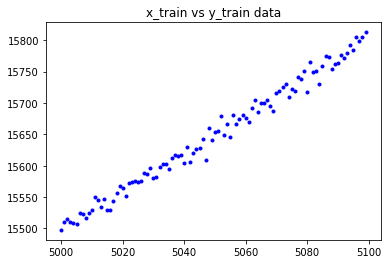

In [181]:
#This step is for data creation, x and y
import numpy as np
x_train= np.array(range(5000,5100)).reshape(-1,1)


y_train=[3*i+np.random.normal(500, 10) for i in x_train]

import matplotlib.pyplot as plt
plt.title("x_train vs y_train data")
plt.plot(x_train, y_train, 'b.')
plt.show()

In [182]:
#Model y=X*W + b
#Model function
def output(x):
    return W*x + b

#Loss function Reduce mean square
def loss_function(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

#Initialize Weights
W = tf.Variable(tf.random.uniform(shape=(1, 1)))
b = tf.Variable(tf.ones(shape=(1,)))

#Optimization
## Writing training/learing loop with GradienTape
learning_rate = 0.000000001
steps = 200 #epochs

for i in range(steps):
    with tf.GradientTape() as tape:
        predictions = output(x_train)
        loss = loss_function(predictions,y_train)
        dloss_dw, dloss_db = tape.gradient(loss, [W, b])
    W.assign_sub(learning_rate * dloss_dw)
    b.assign_sub(learning_rate * dloss_db)
    print(f"epoch : {i}, loss  {loss.numpy()},  W : {W.numpy()}, b  {b.numpy()}")

epoch : 0, loss  201625072.0,  W : [[0.4302729]], b  [1.0000284]
epoch : 1, loss  181585056.0,  W : [[0.5663626]], b  [1.0000553]
epoch : 2, loss  163536896.0,  W : [[0.69551224]], b  [1.000081]
epoch : 3, loss  147282560.0,  W : [[0.81807566]], b  [1.0001053]
epoch : 4, loss  132643792.0,  W : [[0.93438876]], b  [1.0001283]
epoch : 5, loss  119460016.0,  W : [[1.0447704]], b  [1.0001501]
epoch : 6, loss  107586592.0,  W : [[1.1495228]], b  [1.0001708]
epoch : 7, loss  96893320.0,  W : [[1.2489332]], b  [1.0001905]
epoch : 8, loss  87262864.0,  W : [[1.3432741]], b  [1.0002092]
epoch : 9, loss  78589592.0,  W : [[1.432804]], b  [1.000227]
epoch : 10, loss  70778392.0,  W : [[1.5177681]], b  [1.0002438]
epoch : 11, loss  63743548.0,  W : [[1.5983994]], b  [1.0002598]
epoch : 12, loss  57407924.0,  W : [[1.6749187]], b  [1.0002749]
epoch : 13, loss  51702020.0,  W : [[1.7475357]], b  [1.0002893]
epoch : 14, loss  46563252.0,  W : [[1.8164495]], b  [1.0003029]
epoch : 15, loss  41935224.0

epoch : 158, loss  119.04844665527344,  W : [[3.0981958]], b  [1.0005556]
epoch : 159, loss  117.73509979248047,  W : [[3.0982306]], b  [1.0005556]
epoch : 160, loss  116.552490234375,  W : [[3.0982637]], b  [1.0005556]
epoch : 161, loss  115.48542022705078,  W : [[3.0982952]], b  [1.0005556]
epoch : 162, loss  114.52367401123047,  W : [[3.098325]], b  [1.0005556]
epoch : 163, loss  113.65939331054688,  W : [[3.0983531]], b  [1.0005556]
epoch : 164, loss  112.88587188720703,  W : [[3.0983799]], b  [1.0005556]
epoch : 165, loss  112.18827056884766,  W : [[3.0984054]], b  [1.0005556]
epoch : 166, loss  111.55579376220703,  W : [[3.0984294]], b  [1.0005556]
epoch : 167, loss  110.98796844482422,  W : [[3.0984523]], b  [1.0005556]
epoch : 168, loss  110.4770278930664,  W : [[3.098474]], b  [1.0005556]
epoch : 169, loss  110.01807403564453,  W : [[3.0984948]], b  [1.0005556]
epoch : 170, loss  109.60096740722656,  W : [[3.0985143]], b  [1.0005556]
epoch : 171, loss  109.22799682617188,  W :

Final Weights

In [177]:
print('w ', W)
print('b ', b)

w  <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.0986032]], dtype=float32)>
b  <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([1.0004677], dtype=float32)>


Plotting

epoch is: 0, loss is 133146480.0,  W is: [[0.93029135]], b is [1.0000231]


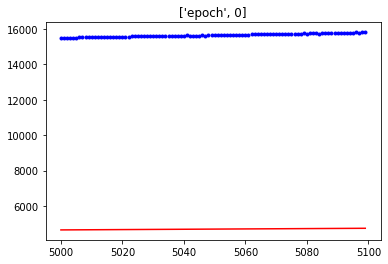

epoch is: 30, loss is 5759752.5,  W is: [[2.6478438]], b is [1.000363]


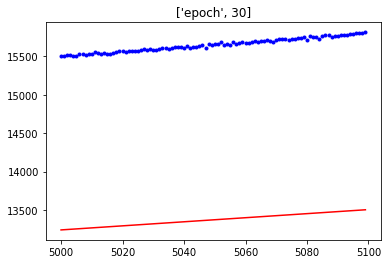

epoch is: 60, loss is 249256.953125,  W is: [[3.00507]], b is [1.0004333]


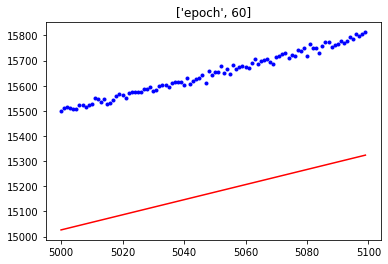

epoch is: 90, loss is 10883.666015625,  W is: [[3.079368]], b is [1.0004481]


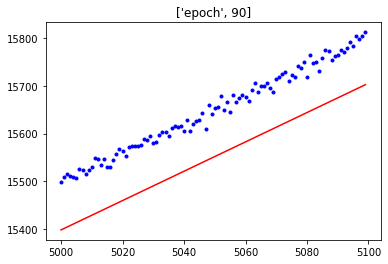

epoch is: 120, loss is 572.026611328125,  W is: [[3.0948212]], b is [1.0004511]


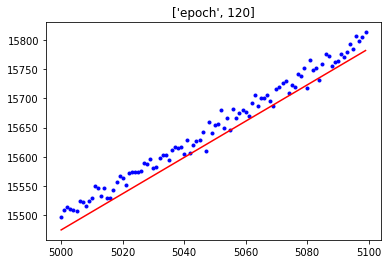

epoch is: 150, loss is 126.01019287109375,  W is: [[3.0980349]], b is [1.0004511]


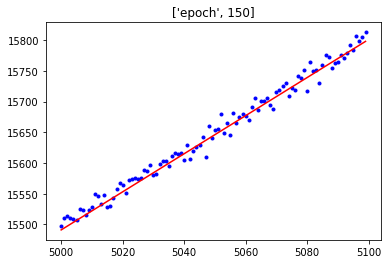

epoch is: 180, loss is 106.71812438964844,  W is: [[3.0987031]], b is [1.0004511]


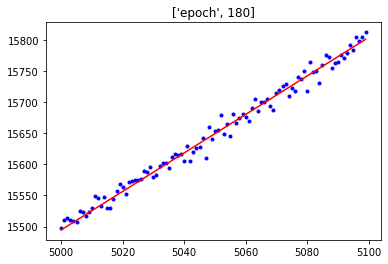

In [184]:
#Initialize Weights
W = tf.Variable(tf.random.uniform(shape=(1, 1)))
b = tf.Variable(tf.ones(shape=(1,)))

#Optimization
## Writing training/learing loop with GradienTape
learning_rate = 0.000000001
steps = 200 #epochs

for i in range(steps):
    with tf.GradientTape() as tape:
        predictions = output(x_train)
        loss = loss_function(predictions,y_train)
        dloss_dw, dloss_db = tape.gradient(loss, [W, b])
    W.assign_sub(learning_rate * dloss_dw)
    b.assign_sub(learning_rate * dloss_db)
    if i%30 == 0:
        print(f"epoch is: {i}, loss is {loss.numpy()},  W is: {W.numpy()}, b is {b.numpy()}")
        plt.title(["epoch", i])
        plt.plot(x_train, y_train, 'b.')
        plt.plot(x_train, output(x_train), c='r')
        plt.show()

### Logistic Regression Model building in TensorFlow

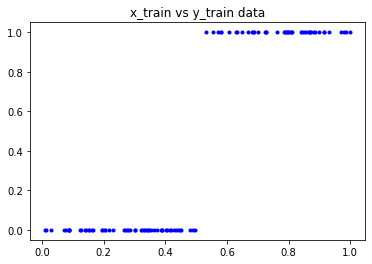

In [216]:
# This step is for data creation
x_train= np.random.rand(100,1)
y_train=np.array([0 if i < 0.5 else 1 for i in x_train]).reshape(-1,1)

import matplotlib.pyplot as plt
plt.title("x_train vs y_train data")
plt.plot(x_train, y_train, 'b.',)
plt.show()

In [217]:
#Model y=sigmoid(X*W + b)
# same as the linear regression just sigmoid wrapped around the linear equation
def output(x): 
    return tf.sigmoid(W*x + b)

#Loss function : sum of squares
def loss_function(y_pred, y_true):
    return tf.reduce_sum(tf.square(y_pred - y_true))

#Initialize Weights
W = tf.Variable(tf.random.uniform(shape=(1, 1)))
b = tf.Variable(tf.zeros(shape=(1,)))

## Optimization
learning_rate = 0.1
steps = 300 #epochs

for i in range(steps):
    with tf.GradientTape() as tape:
        predictions = output(x_train)
        loss = loss_function(y_train, predictions)
        dloss_dw, dloss_db = tape.gradient(loss, [W, b])
    W.assign_sub(learning_rate * dloss_dw)
    b.assign_sub(learning_rate * dloss_db)
    print(f"epoch : {i}, loss  {loss.numpy()},  W : {W.numpy()}, b  {b.numpy()}")

epoch : 0, loss  22.60688591003418,  W : [[0.87064445]], b  [-0.704729]
epoch : 1, loss  19.765960693359375,  W : [[1.4657314]], b  [-0.57066584]
epoch : 2, loss  17.57000732421875,  W : [[1.6805136]], b  [-1.0579883]
epoch : 3, loss  15.81714153289795,  W : [[2.148072]], b  [-0.9888156]
epoch : 4, loss  14.389200210571289,  W : [[2.3391197]], b  [-1.3615319]
epoch : 5, loss  13.206083297729492,  W : [[2.707578]], b  [-1.3390965]
epoch : 6, loss  12.225578308105469,  W : [[2.8894737]], b  [-1.6081121]
epoch : 7, loss  11.402377128601074,  W : [[3.1746352]], b  [-1.6371683]
epoch : 8, loss  10.709866523742676,  W : [[3.355033]], b  [-1.8193855]
epoch : 9, loss  10.119711875915527,  W : [[3.578357]], b  [-1.8861303]
epoch : 10, loss  9.611478805541992,  W : [[3.7530646]], b  [-2.01186]
epoch : 11, loss  9.168173789978027,  W : [[3.936611]], b  [-2.0938454]
epoch : 12, loss  8.777385711669922,  W : [[4.099397]], b  [-2.19015]
epoch : 13, loss  8.429791450500488,  W : [[4.258378]], b  [-2.

epoch : 179, loss  2.3743503093719482,  W : [[11.687948]], b  [-6.186102]
epoch : 180, loss  2.3684628009796143,  W : [[11.709458]], b  [-6.197166]
epoch : 181, loss  2.362624168395996,  W : [[11.730881]], b  [-6.2081842]
epoch : 182, loss  2.35683274269104,  W : [[11.752216]], b  [-6.219157]
epoch : 183, loss  2.351088047027588,  W : [[11.773467]], b  [-6.230085]
epoch : 184, loss  2.3453893661499023,  W : [[11.794632]], b  [-6.2409687]
epoch : 185, loss  2.3397364616394043,  W : [[11.815713]], b  [-6.251808]
epoch : 186, loss  2.3341288566589355,  W : [[11.836711]], b  [-6.262604]
epoch : 187, loss  2.3285648822784424,  W : [[11.857626]], b  [-6.2733574]
epoch : 188, loss  2.323044776916504,  W : [[11.87846]], b  [-6.2840676]
epoch : 189, loss  2.317567825317383,  W : [[11.899213]], b  [-6.2947354]
epoch : 190, loss  2.312134027481079,  W : [[11.919886]], b  [-6.3053617]
epoch : 191, loss  2.306741237640381,  W : [[11.940478]], b  [-6.315946]
epoch : 192, loss  2.3013906478881836,  W

Plotting

epoch is: 0, loss is 22.41008186340332,  W is: [[0.93407756]], b is [-0.78293735]


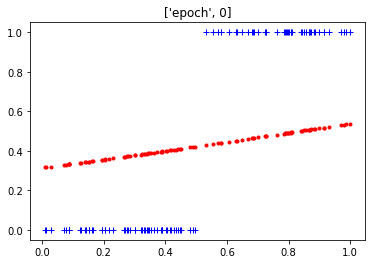

epoch is: 40, loss is 4.756344318389893,  W is: [[6.8904214]], b is [-3.6844785]


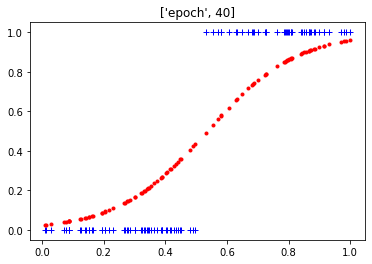

epoch is: 80, loss is 3.4186770915985107,  W is: [[8.891755]], b is [-4.738308]


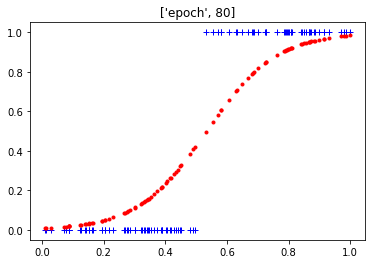

epoch is: 120, loss is 2.839423656463623,  W is: [[10.229227]], b is [-5.433549]


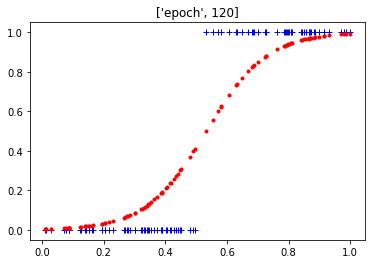

epoch is: 160, loss is 2.4949848651885986,  W is: [[11.265974]], b is [-5.968881]


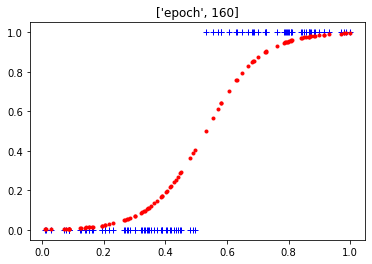

epoch is: 200, loss is 2.2590367794036865,  W is: [[12.126228]], b is [-6.41139]


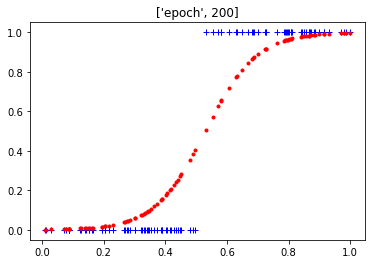

epoch is: 240, loss is 2.083829879760742,  W is: [[12.868614]], b is [-6.7923784]


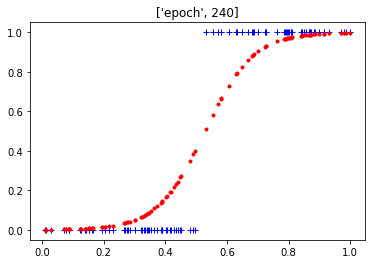

epoch is: 280, loss is 1.9467601776123047,  W is: [[13.525861]], b is [-7.1291747]


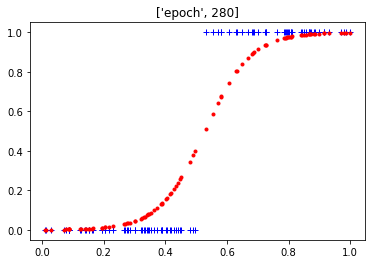

In [220]:
#Model y=X*W + b
# same as the linear regression just sigmoid wrapped around the linear equation
def output(x): 
    return tf.sigmoid(W*x + b)

#Loss function : sum of squares
def loss_function(y_pred, y_true):
    return tf.reduce_sum(tf.square(y_pred - y_true))

#Initialize Weights
W = tf.Variable(tf.random.uniform(shape=(1, 1)))
b = tf.Variable(tf.zeros(shape=(1,)))

## Optimization
learning_rate = 0.1
steps = 300 #epochs

for i in range(steps):
    with tf.GradientTape() as tape:
        predictions = output(x_train)
        loss = loss_function(y_train, predictions)
        dloss_dw, dloss_db = tape.gradient(loss, [W, b])
    W.assign_sub(learning_rate * dloss_dw)
    b.assign_sub(learning_rate * dloss_db)

    if i%40 == 0:
        print(f"epoch is: {i}, loss is {loss.numpy()},  W is: {W.numpy()}, b is {b.numpy()}")
        plt.title(["epoch", i])
        plt.plot(x_train, y_train, 'b+')
        plt.plot(x_train, output(x_train), '.', c='r')
        plt.show()

# Keras

In [1]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
## The data, shuffled and split between train and test sets
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()
num_classes=10
x_train = X_train.reshape(60000, 784)
x_test = X_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

## Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(Y_train, num_classes)
y_test = keras.utils.to_categorical(Y_test, num_classes)

print(x_train.shape, 'train input samples')
print(x_test.shape, 'test input samples')

print(y_train.shape, 'train output samples')
print(y_test.shape, 'test output samples')

(60000, 784) train input samples
(10000, 784) test input samples
(60000, 10) train output samples
(10000, 10) test output samples


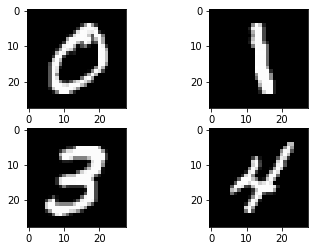

In [3]:
# Plot 4 images as gray scale

%matplotlib inline
import matplotlib.pyplot as plt
plt.subplot(221)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[6], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[7], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[9], cmap=plt.get_cmap('gray'))

# show the plot
plt.show()

In [4]:
model = keras.Sequential()
#Input Layer. The model needs to know what input shape it should expect. 
#For this reason, the first layer in a Sequential model needs to receive information about its input shape.
#Only the first need the snape information, because following layers can do automatic shape inference
model.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))

#The dense layer is simply a layer where each unit or neuron is connected to each neuron in the next layer.
model.add(layers.Dense(20, activation='sigmoid'))

#In the final layer mention the output classes
model.add(layers.Dense(10, activation='softmax'))

#Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                15700     
_________________________________________________________________
dense_1 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________


In [24]:
# Compiling model : we define loss function, optimizer and validation matric of our choice
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

# Fit method: actually running our model by supplying our input and validation data
model.fit(x_train, y_train,epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.0902 - accuracy: 0.9751
Epoch 2/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.0892 - accuracy: 0.9750
Epoch 3/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.0887 - accuracy: 0.9757
Epoch 4/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.0885 - accuracy: 0.9751
Epoch 5/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0875 - accuracy: 0.9761
Epoch 6/10
60000/60000 [==============================] - 3s 49us/sample - loss: 0.0874 - accuracy: 0.9761
Epoch 7/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0870 - accuracy: 0.9757
Epoch 8/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.0863 - accuracy: 0.9766
Epoch 9/10
60000/60000 [==============================] - 3s 49us/sample - loss: 0.0860 - accuracy: 0.9761
Epoch 10/10
60

In [25]:
print(model.get_weights())

[array([[ 0.02515895, -0.01559025,  0.03362186, ..., -0.00533213,
         0.05649216,  0.025332  ],
       [-0.05847708,  0.0782025 , -0.07481801, ...,  0.02249032,
         0.05449276,  0.01085745],
       [-0.06403062,  0.0229304 ,  0.03201031, ...,  0.05748107,
         0.06042245,  0.02254006],
       ...,
       [-0.05844365,  0.03318997,  0.02229793, ..., -0.03238098,
        -0.02750115, -0.08346611],
       [ 0.05739182,  0.07825617, -0.04091686, ..., -0.01256936,
        -0.05618969,  0.05506155],
       [-0.00301135,  0.05287901, -0.03004961, ...,  0.08535139,
         0.01862317,  0.07038946]], dtype=float32), array([ 0.27913886, -1.161148  ,  0.41095665,  1.6458611 ,  0.7189761 ,
        1.0200715 ,  1.2982562 , -1.3038647 ,  1.9918022 , -0.0543932 ,
       -1.8487521 , -0.6957587 ,  1.5204716 ,  1.383461  , -0.690064  ,
        0.34693217,  2.063581  ,  1.6646893 , -0.02937878,  0.09946878],
      dtype=float32), array([[ 1.59261036e+00,  9.01293531e-02,  6.44480228e-01,


In [26]:
loss, acc = model.evaluate(x_test,  y_test, verbose=2)
print("Test Accuracy: {:5.2f}%".format(100*acc))

10000/1 - 0s - loss: 0.0838 - accuracy: 0.9594
Test Accuracy: 95.94%
